In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../currency_data')
data.head()

,datetime,PLN,RUB
0,2011-11-11,3.240659,30.456264
1,2011-11-14,3.218098,30.494326
2,2011-11-15,3.262267,30.708691
3,2011-11-16,3.283595,30.773509
4,2011-11-17,3.292878,30.859718


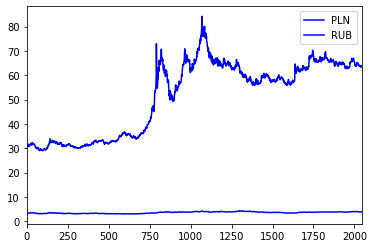

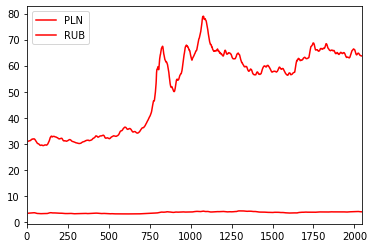

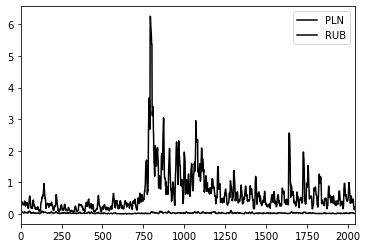

In [3]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()

data.plot(color='blue',label='Original')
rolmean.plot(color='red', label='Rolling Mean')
rolstd.plot(color='black', label = 'Rolling Std')
plt.legend(loc='best')

In [4]:
data['RUB'].head()
data['RUB'].describe()

count    2045.000000
mean       51.434654
std        15.085757
min        28.999475
25%        33.032620
50%        57.736829
75%        64.367055
max        84.243092
Name: RUB, dtype: float64

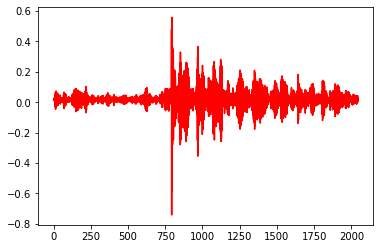

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

model = ARIMA(data['RUB'], order=(1,1,1))
results = model.fit(disp=-1)

plt.plot(results.fittedvalues, color='red')

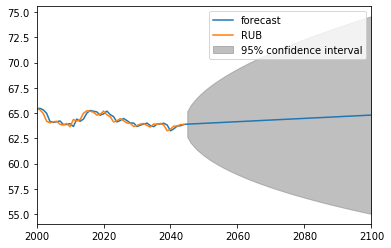

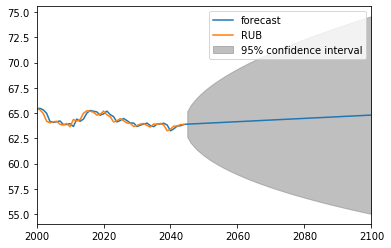

In [6]:
results.plot_predict(2000, 2100)